In [166]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import pearsonr

Ładowanie zbioru danych "cars"

In [167]:
df = pd.read_csv('data/cars.csv')

Przejrzenie zawartości zbioru i jego kształtu

In [168]:
df.shape

(392, 9)

In [169]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Przekształcenie roku produkcji do pełnego zapisu

In [170]:
df['year'] = df['year'] + 1900

Przeprowadzenie konwersji spalania z mpg na l/100km oraz pojemności skokowej z cal^3 na litry

In [171]:
df['l/100km'] = round((((1/df['mpg']) * 3.78541) / 1.60934) * 100, 2) # 1 gal = 3.78541 l; 1 km = 1.60934 mi
df['displacement'] = round(df['displacement'] * 2.54 ** 3 / 1000, 1) # 1 cal = 2.54 cm

Odrzucenie zbędnej kolumny dotyczącej spalania w milach na galon oraz kraju pochodzenia

In [172]:
df.drop("mpg", axis=1, inplace=True)

Konwertowanie kraju pochodzenia w postaci liczbowej na bardziej intuicyjną wartość tekstową

In [173]:
origin_map = {
    1: 'USA',
    2: 'Europe',
    3: 'Japan'
}

df['region'] = df['origin'].map(origin_map)

Wyodrębnienie marki samochodu z kolumny z nazwą

In [174]:
df['brand'] = df['name'].str.split().str[0]

Sprawdzanie otrzymanego rezultatu

In [175]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,l/100km,region,brand
0,8,5.0,130,3504,12.0,1970,1,chevrolet chevelle malibu,13.07,USA,chevrolet
1,8,5.7,165,3693,11.5,1970,1,buick skylark 320,15.68,USA,buick
2,8,5.2,150,3436,11.0,1970,1,plymouth satellite,13.07,USA,plymouth
3,8,5.0,150,3433,12.0,1970,1,amc rebel sst,14.70,USA,amc
4,8,4.9,140,3449,10.5,1970,1,ford torino,13.84,USA,ford


In [176]:
df['brand'].value_counts()

brand
ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
vw                6
volvo             6
chrysler          6
saab              4
subaru            4
opel              4
chevy             3
renault           3
cadillac          2
bmw               2
mercedes-benz     2
maxda             2
hi                1
toyouta           1
chevroelt         1
capri             1
mercedes          1
vokswagen         1
triumph           1
nissan            1
Name: count, dtype: int64

Poprawianie błędnych wartości tekstowych

In [177]:
df['brand'] = df['brand'].replace({
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'maxda': 'mazda',
    'chevy': 'chevrolet',
    'capri': 'ford',
    'toyouta': 'toyota',
    'chevroelt': 'chevrolet',
    'mercedes': 'mercedes-benz',
    'hi': 'international'
})

Tworzenie wykresu liczebności aut danej marki w zbiorze

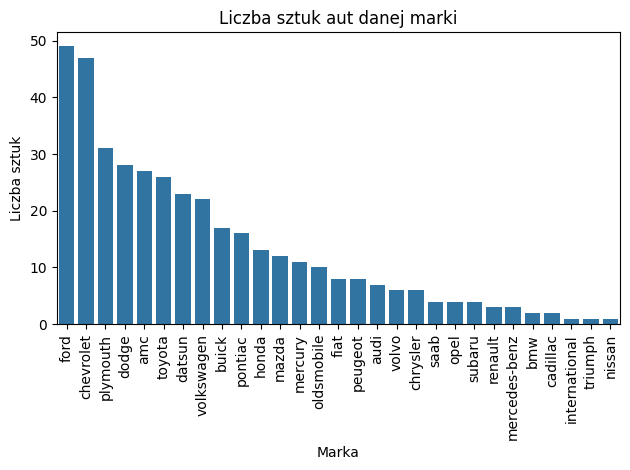

In [178]:
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.title('Liczba sztuk aut danej marki')
plt.xlabel('Marka')
plt.ylabel('Liczba sztuk')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Sprawdzamy, czy w datasecie są wartości brakujące - nie ma

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int64  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   year          392 non-null    int64  
 6   origin        392 non-null    int64  
 7   name          392 non-null    object 
 8   l/100km       392 non-null    float64
 9   region        392 non-null    object 
 10  brand         392 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 33.8+ KB


In [180]:
df.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
l/100km         0
region          0
brand           0
dtype: int64

Badamy zbiór danych pod kątem zduplikowanych wierszy

In [181]:
df.duplicated().sum()

np.int64(0)

Regresja liniowa jest mało odporna na dane odstające, więc sprawdzamy dataset pod ich kątem

In [182]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,l/100km
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,3.192092,104.469388,2977.584184,15.541327,1975.979592,1.576531,11.248418
std,1.705783,1.711721,38.491160,849.402560,2.758864,3.683737,0.805518,3.913358
min,3.000000,1.100000,46.000000,1613.000000,8.000000,1970.000000,1.000000,5.050000
25%,4.000000,1.700000,75.000000,2225.250000,13.775000,1973.000000,1.000000,8.110000
50%,4.000000,2.500000,93.500000,2803.500000,15.500000,1976.000000,1.000000,10.340000
75%,8.000000,4.525000,126.000000,3614.750000,17.025000,1979.000000,2.000000,13.840000
max,8.000000,7.500000,230.000000,5140.000000,24.800000,1982.000000,3.000000,26.140000


Analiza wartości odstających przy pomocy wykresów pudekowych

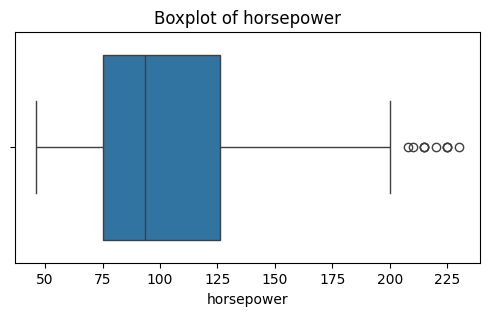

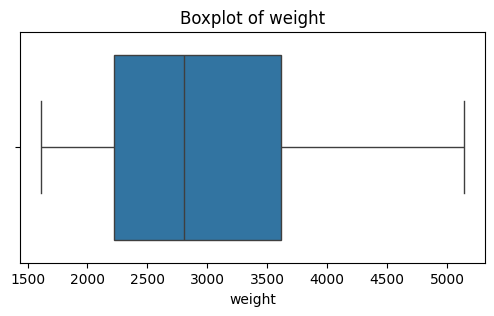

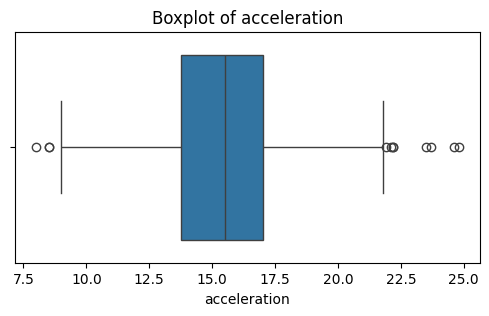

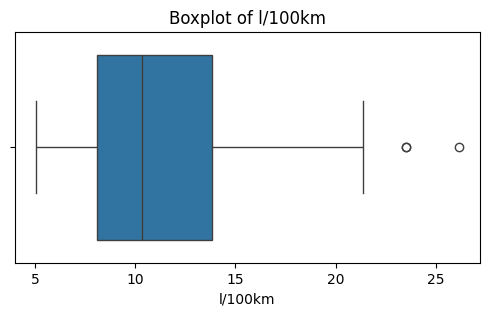

In [183]:
num_cols = ['horsepower', 'weight', 'acceleration', 'l/100km']
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

Wartości odstające przyjmują wartości prawdopodobne, więc nie będą usuwane

Wstępna wizualizacja zależności między liczbą koni mechanicznych (wartością numeryczną), a pozostałymi zmiennymi. Relacje z innymi wartościami numerycznymi uwidocznione na wykresach punktowych, a z kategoriami na wykresach pudełkowych

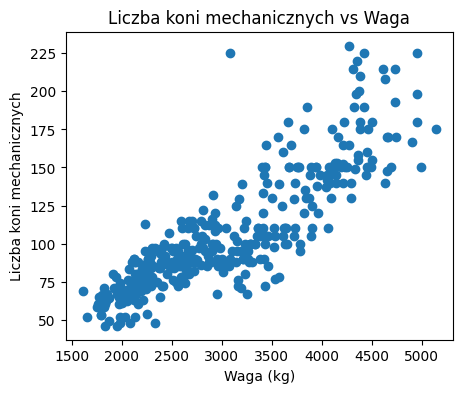

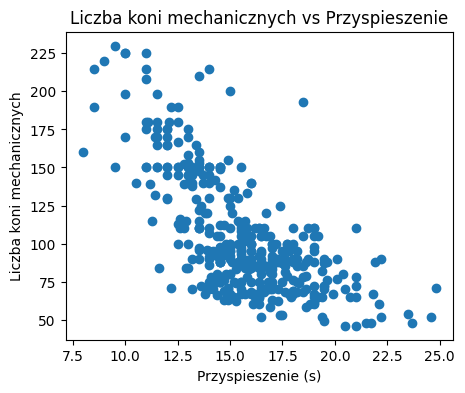

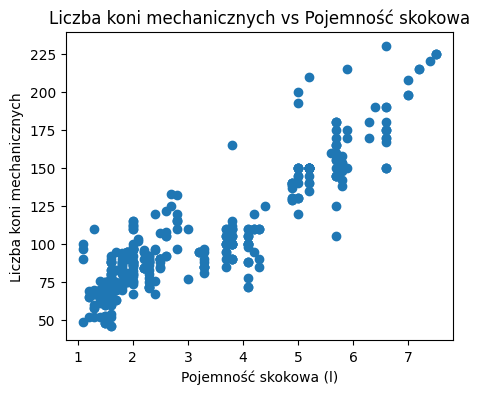

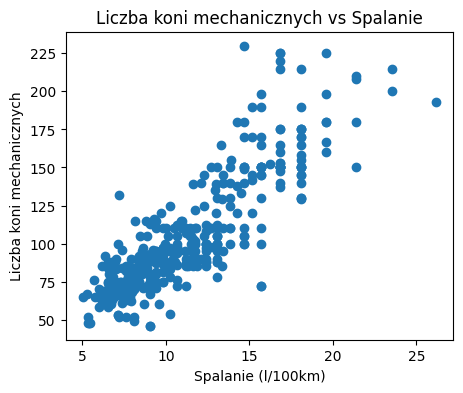

In [184]:
f, ax = plt.subplots(figsize=(5, 4))
plt.scatter(df["weight"], df["horsepower"])
plt.xlabel("Waga (kg)")
plt.ylabel("Liczba koni mechanicznych")
plt.title("Liczba koni mechanicznych vs Waga")
plt.show()

f, ax = plt.subplots(figsize=(5, 4))
plt.scatter(df["acceleration"], df["horsepower"])
plt.xlabel("Przyspieszenie (s)")
plt.ylabel("Liczba koni mechanicznych")
plt.title("Liczba koni mechanicznych vs Przyspieszenie")
plt.show()

f, ax = plt.subplots(figsize=(5, 4))
plt.scatter(df["displacement"], df["horsepower"])
plt.xlabel("Pojemność skokowa (l)")
plt.ylabel("Liczba koni mechanicznych")
plt.title("Liczba koni mechanicznych vs Pojemność skokowa")
plt.show()

f, ax = plt.subplots(figsize=(5, 4))
plt.scatter(df["l/100km"], df["horsepower"])
plt.xlabel("Spalanie (l/100km)")
plt.ylabel("Liczba koni mechanicznych")
plt.title("Liczba koni mechanicznych vs Spalanie")
plt.show()

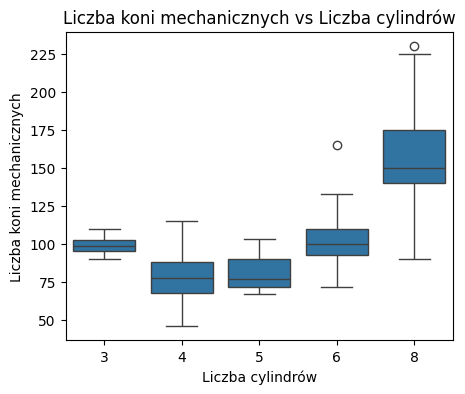

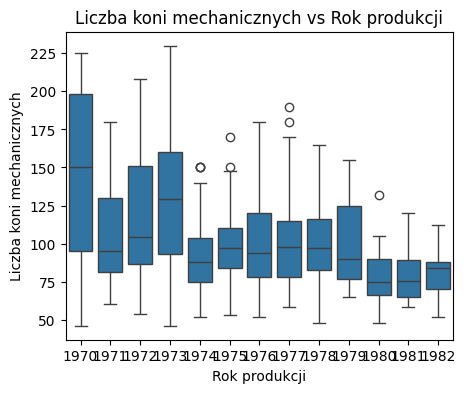

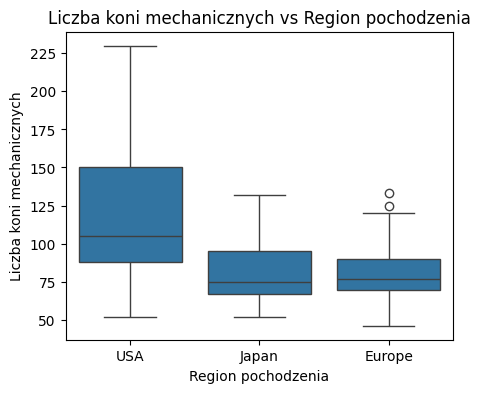

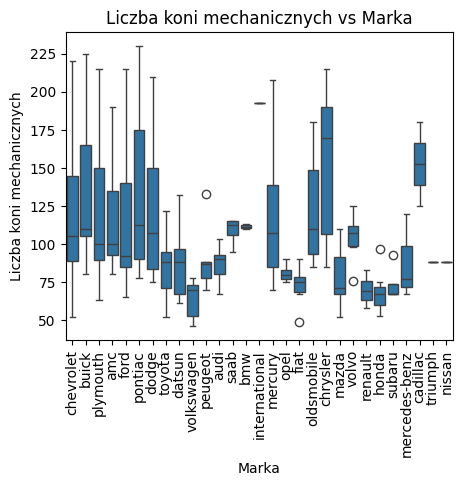

In [185]:
f, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='cylinders', y='horsepower', data=df)
plt.title("Liczba koni mechanicznych vs Liczba cylindrów")
plt.xlabel("Liczba cylindrów")
plt.ylabel("Liczba koni mechanicznych")
plt.show()

f, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='year', y='horsepower', data=df)
plt.title("Liczba koni mechanicznych vs Rok produkcji")
plt.xlabel("Rok produkcji")
plt.ylabel("Liczba koni mechanicznych")
plt.show()

f, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='region', y='horsepower', data=df)
plt.title("Liczba koni mechanicznych vs Region pochodzenia")
plt.xlabel("Region pochodzenia")
plt.ylabel("Liczba koni mechanicznych")
plt.show()

f, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='brand', y='horsepower', data=df)
plt.title("Liczba koni mechanicznych vs Marka")
plt.xlabel("Marka")
plt.ylabel("Liczba koni mechanicznych")
plt.xticks(rotation=90)
plt.show()

Badanie zależności między dwiema zmiennymi przy pomocy macierzy korelacji

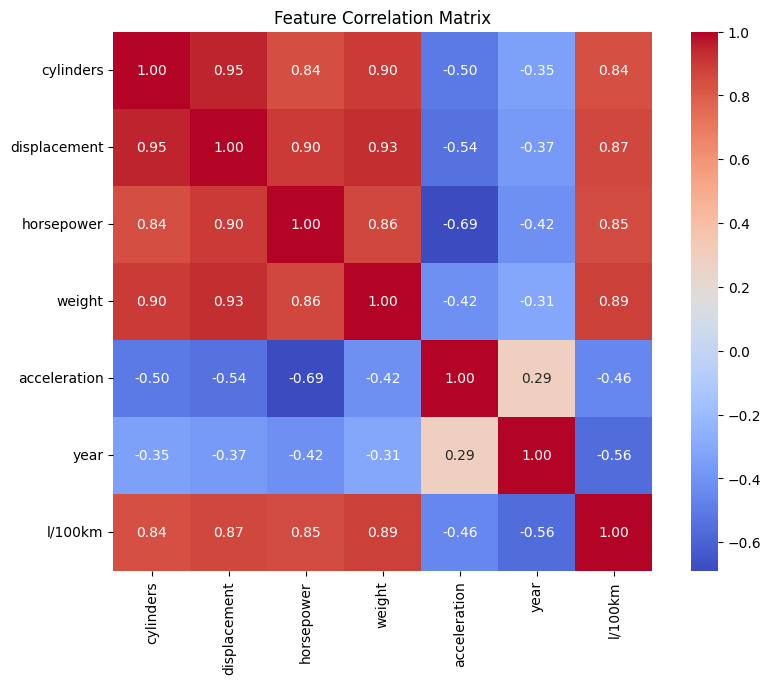

In [186]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.drop(columns=['name', 'brand', 'region', 'origin']).corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

Sprawdzanie istotności statystycznej korelacji pomiędzy różnymi cechami, a liczbą koni mechanicznych

In [187]:
features = ['weight', 'acceleration', 'cylinders', 'displacement', 'l/100km', 'year']
SIGNIFICANCE_THRESHOLD = 0.05

for feature in features:
    corr_coef, p_value = pearsonr(df[feature], df['horsepower'])
    print(f"Korelacja Pearsona między '{feature}' a Liczbą koni mechanicznych: {corr_coef:.4f}")
    print(f"Wartość p: {p_value:.4f}")
    print(f"Cecha {feature}{' NIE ' if p_value > SIGNIFICANCE_THRESHOLD else ' '}jest statystycznie istotna.\n")

Korelacja Pearsona między 'weight' a Liczbą koni mechanicznych: 0.8645
Wartość p: 0.0000
Cecha weight jest statystycznie istotna.

Korelacja Pearsona między 'acceleration' a Liczbą koni mechanicznych: -0.6892
Wartość p: 0.0000
Cecha acceleration jest statystycznie istotna.

Korelacja Pearsona między 'cylinders' a Liczbą koni mechanicznych: 0.8430
Wartość p: 0.0000
Cecha cylinders jest statystycznie istotna.

Korelacja Pearsona między 'displacement' a Liczbą koni mechanicznych: 0.8974
Wartość p: 0.0000
Cecha displacement jest statystycznie istotna.

Korelacja Pearsona między 'l/100km' a Liczbą koni mechanicznych: 0.8548
Wartość p: 0.0000
Cecha l/100km jest statystycznie istotna.

Korelacja Pearsona między 'year' a Liczbą koni mechanicznych: -0.4164
Wartość p: 0.0000
Cecha year jest statystycznie istotna.



Wszystkie powyższe zmienne przedstawiają statystycznie istotne korelacje - od umiarkowanych po silne.

Budujemy model regresji liniowej w oparciu o backward selection - zaczynamy od wszystkich zmiennych (poza tymi zmiennymi kategorycznymi, których nie możemy przedstawić w postaci numerycznej), a następnie usuwamy zmienną o największym parametrze P-value do momentu aż wszystkie zmienne mają P-value < 0.05

In [188]:
X = df.drop(columns=['horsepower', 'name', 'brand', 'region'])
y = df['horsepower']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     531.4
Date:                Fri, 25 Jul 2025   Prob (F-statistic):          3.51e-193
Time:                        22:27:51   Log-Likelihood:                -1522.4
No. Observations:                 392   AIC:                             3061.
Df Residuals:                     384   BIC:                             3092.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          215.7023    447.991      0.481   

Ze względu na wysokie P-value odrzucamy rok produkcji

In [189]:
X = df.drop(columns=['horsepower', 'name', 'brand', 'region', 'year'])
y = df['horsepower']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     621.5
Date:                Fri, 25 Jul 2025   Prob (F-statistic):          1.41e-194
Time:                        22:27:51   Log-Likelihood:                -1522.4
No. Observations:                 392   AIC:                             3059.
Df Residuals:                     385   BIC:                             3087.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           83.0522      6.530     12.719   

W ten sposób pozbyliśmy się parametrów przekraczających wyznaczoną wartość progową P-value i poprawiliśmy wartość F-statistic.

TODO: sprawdzić fizycznie uzasadnione synergie między cechami

weight * acceleration
cylinders * displacement
weight * displacement
acceleration * year
origin * displacement

TODO: stworzyć model predykcyjny

TODO: R2 Score, MSE, analiza reszt, confusion matrix